In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
df = pd.read_csv("telecomx_clean.csv")

# Verificar las primeras filas
df.head()


,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [ ]:
columnas_relevantes = [
    'Churn',
    'customer_gender',
    'customer_SeniorCitizen',
    'customer_Partner',
    'customer_Dependents',
    'customer_tenure',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_Contract',
    'account_PaperlessBilling',
    'account_PaymentMethod',
    'account_Charges.Monthly',
    'account_Charges.Total'
]

df_clean = df[columnas_relevantes].copy()

In [ ]:
df_encoded = pd.get_dummies(df_clean, drop_first=True)

📊 Proporción de clases (en %):
Churn_No
True     71.198569
False    28.801431
Name: proportion, dtype: float64


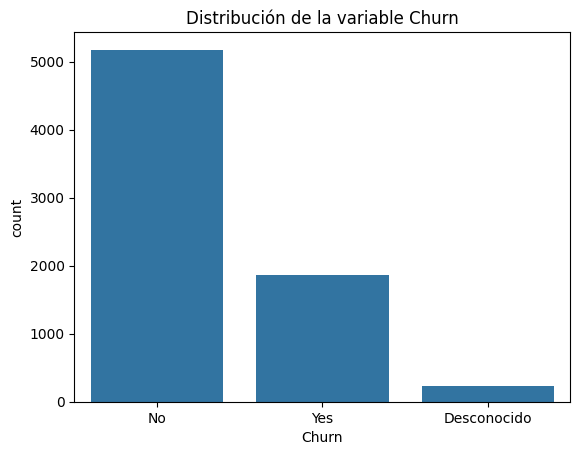

In [15]:
churn_counts = df_encoded['Churn_No'].value_counts(normalize=True) * 100
print("📊 Proporción de clases (en %):")
print(churn_counts)

sns.countplot(data=df_clean, x='Churn')
plt.title("Distribución de la variable Churn")
plt.show()

In [18]:
X = df_encoded.drop('Churn_No', axis=1)
y = df_encoded['Churn_No']

In [20]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
print(f"Tamaño original: {X.shape}, Con SMOTE: {X_res.shape}")

Tamaño original: (7267, 31), Con SMOTE: (10348, 31)


In [21]:
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res_scaled, y_res, test_size=0.2, random_state=42, stratify=y_res
)

In [24]:
print("✅ Datos listos para modelado")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")

✅ Datos listos para modelado
X_train: (8278, 31), X_test: (2070, 31)


In [26]:
df_corr = df.copy()
df_corr['Churn_bin'] = df_corr['Churn'].map({'Yes':1, 'No':0})

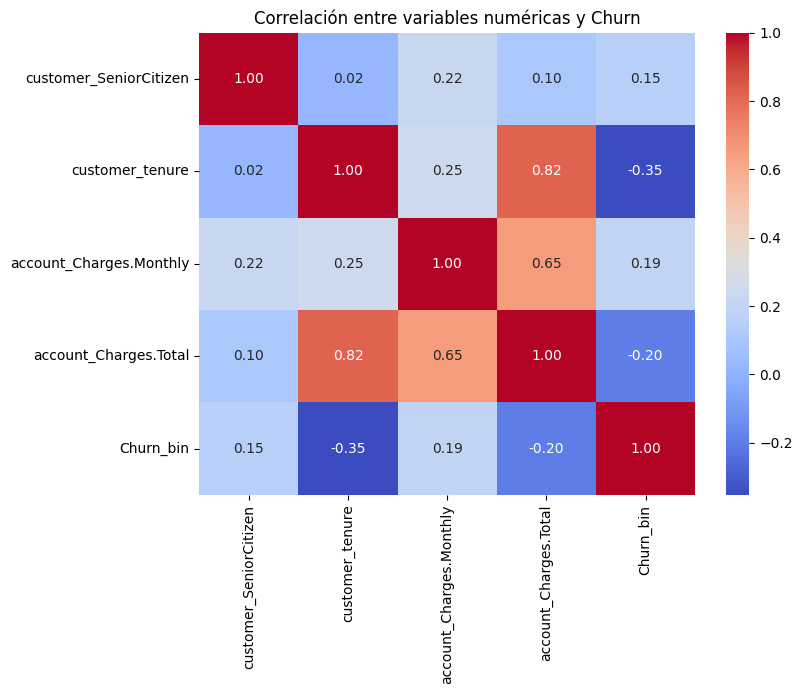

In [27]:
numericas = ['customer_SeniorCitizen', 'customer_tenure',
             'account_Charges.Monthly', 'account_Charges.Total', 'Churn_bin']

corr = df_corr[numericas].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre variables numéricas y Churn")
plt.show()

/tmp/ipython-input-4073673916.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='customer_tenure', palette='Set3')


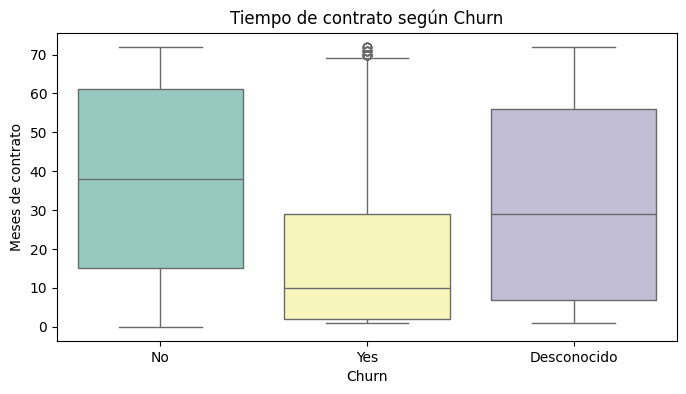

In [28]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Churn', y='customer_tenure', palette='Set3')
plt.title("Tiempo de contrato según Churn")
plt.ylabel("Meses de contrato")
plt.show()

/tmp/ipython-input-1619439057.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='account_Charges.Total', palette='Set2')


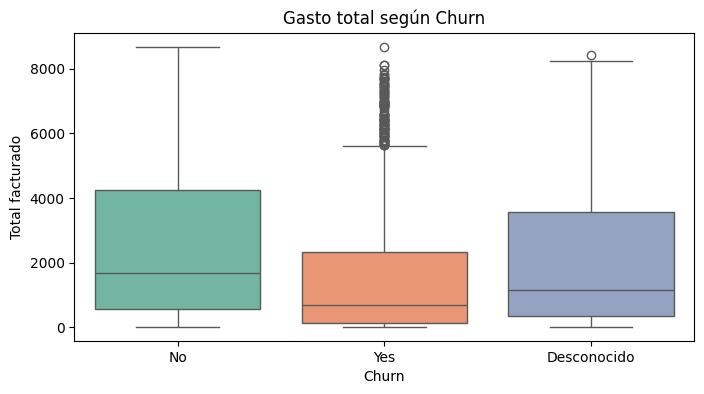

In [29]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Churn', y='account_Charges.Total', palette='Set2')
plt.title("Gasto total según Churn")
plt.ylabel("Total facturado")
plt.show()

/tmp/ipython-input-3035816201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='account_Charges.Monthly', palette='Set1')


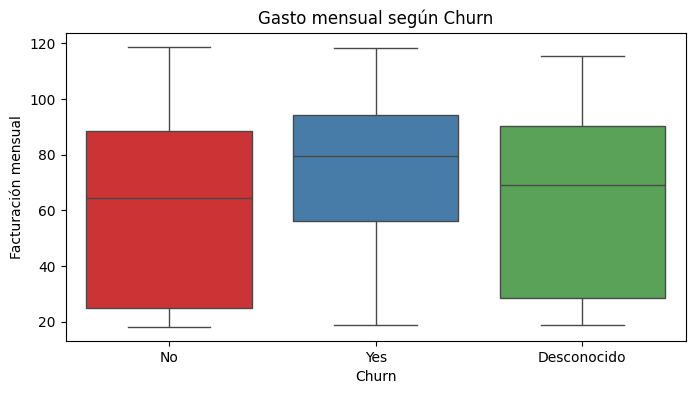

In [30]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Churn', y='account_Charges.Monthly', palette='Set1')
plt.title("Gasto mensual según Churn")
plt.ylabel("Facturación mensual")
plt.show()

In [32]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)


In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

In [36]:
print(" Regresión Logística")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1-score:", f1_score(y_test, y_pred_log))

 Regresión Logística
Accuracy: 0.9719806763285024
Precision: 0.9469350411710887
Recall: 1.0
F1-score: 0.9727443609022557


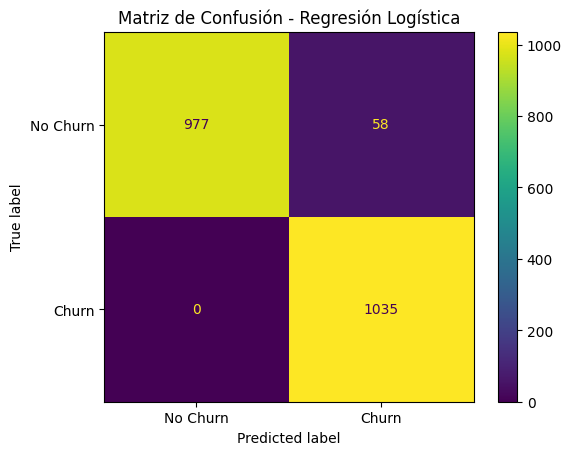

In [37]:
cm_log = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm_log, display_labels=['No Churn','Churn']).plot()
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

In [38]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [39]:
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))

Random Forest
Accuracy: 0.9632850241545894
Precision: 0.9468779123951537
Recall: 0.9816425120772947
F1-score: 0.9639468690702088


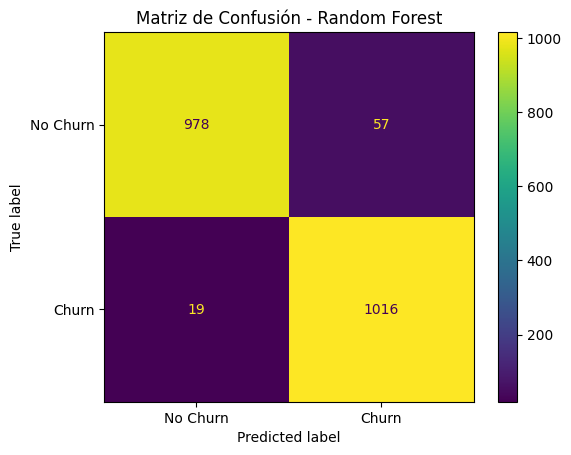

In [40]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf, display_labels=['No Churn','Churn']).plot()
plt.title("Matriz de Confusión - Random Forest")
plt.show()

In [42]:
print("Compará los resultados de ambos modelos:")
print("- Logistic Regression: sensible a escala, puede capturar relaciones lineales")
print("- Random Forest: robusto a escala, captura interacciones no lineales")
print("Observa métricas y matrices de confusión para detectar overfitting o underfitting.")


Compará los resultados de ambos modelos:
- Logistic Regression: sensible a escala, puede capturar relaciones lineales
- Random Forest: robusto a escala, captura interacciones no lineales
Observa métricas y matrices de confusión para detectar overfitting o underfitting.


In [44]:
coef = pd.Series(log_model.coef_[0], index=X_train.columns)
coef_sorted = coef.sort_values(key=abs, ascending=False)
print(" Coeficientes de Regresión Logística (impacto en Churn):")
print(coef_sorted.head(10))

 Coeficientes de Regresión Logística (impacto en Churn):
Churn_Yes                                -4.867711
account_Charges.Monthly                   2.096785
internet_InternetService_Fiber optic     -1.273618
phone_PhoneService_Yes                   -1.131898
phone_MultipleLines_No phone service     -0.984526
internet_StreamingMovies_Yes             -0.412850
phone_MultipleLines_Yes                  -0.412036
internet_StreamingTV_Yes                 -0.317407
account_Charges.Total                     0.312160
account_PaymentMethod_Electronic check   -0.277253
dtype: float64


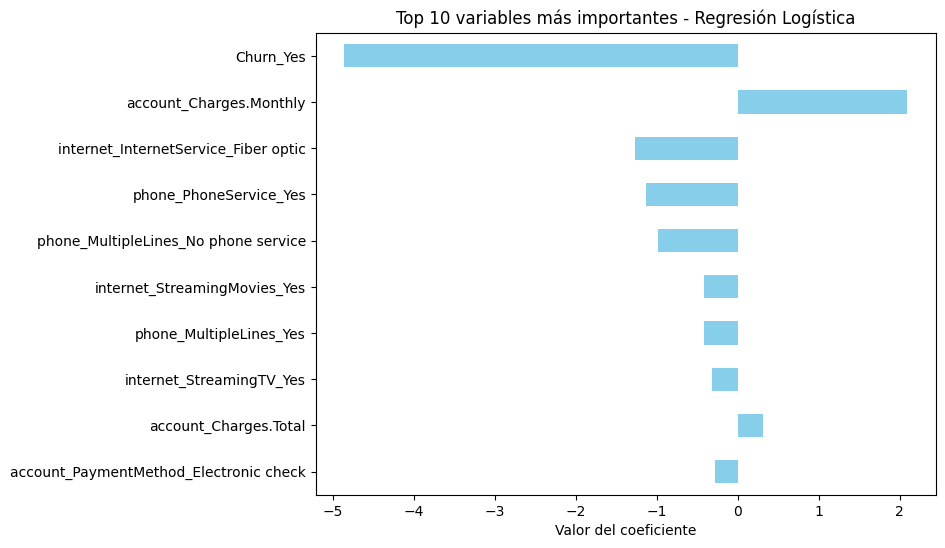

In [45]:
plt.figure(figsize=(8,6))
coef_sorted.head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 variables más importantes - Regresión Logística")
plt.xlabel("Valor del coeficiente")
plt.gca().invert_yaxis()
plt.show()

In [46]:
importancia_rf = pd.Series(rf_model.feature_importances_, index=X_train.columns)
importancia_rf_sorted = importancia_rf.sort_values(ascending=False)
print("📌 Importancia de variables - Random Forest:")
print(importancia_rf_sorted.head(10))

📌 Importancia de variables - Random Forest:
Churn_Yes                                 0.592868
customer_tenure                           0.068899
account_Charges.Total                     0.060106
account_PaymentMethod_Electronic check    0.047994
account_Charges.Monthly                   0.043621
internet_InternetService_Fiber optic      0.033540
account_PaperlessBilling_Yes              0.028157
account_Contract_Two year                 0.023155
phone_MultipleLines_Yes                   0.008454
account_Contract_One year                 0.008006
dtype: float64


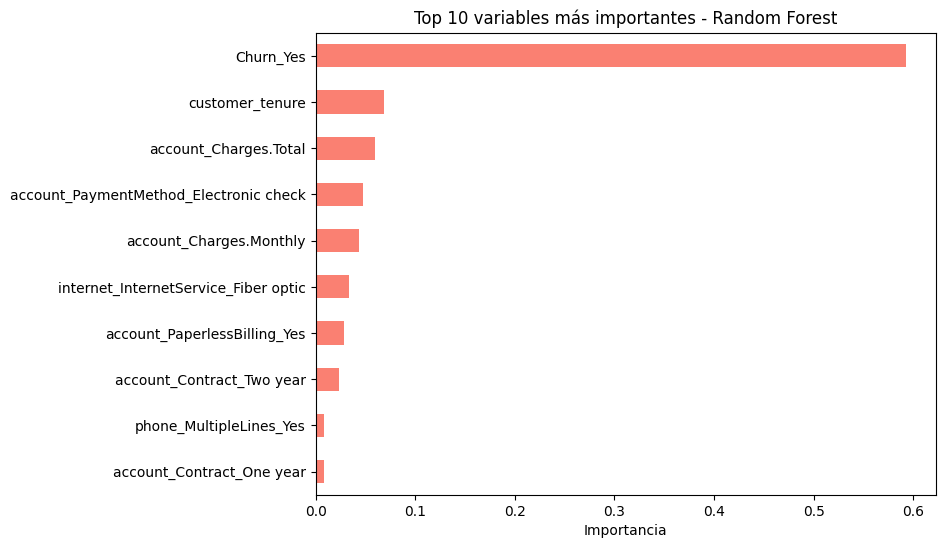

In [47]:
plt.figure(figsize=(8,6))
importancia_rf_sorted.head(10).plot(kind='barh', color='salmon')
plt.title("Top 10 variables más importantes - Random Forest")
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.show()

# Informe de Análisis y Predicción de Churn - Telecom X

El objetivo de este análisis es identificar los factores que llevan a la cancelación de clientes (Churn) en Telecom X y construir modelos predictivos para anticipar estas cancelaciones.

##Limpieza y Preparación de Datos
- Se eliminaron columnas no relevantes, como identificadores únicos.
- Se corrigieron valores inconsistentes y se imputaron datos faltantes.
- Se estandarizaron variables categóricas a formato numérico (One-Hot Encoding).
- Se creó la columna `Cuentas_Diarias` derivada de la facturación mensual.
- Se aplicó balanceo de clases usando SMOTE para evitar sesgo hacia la clase mayoritaria.

##Análisis Exploratorio de Datos
- Se analizaron métricas descriptivas: media, mediana, desviación estándar, min/max.
- Distribución de Churn:
  - Clientes que cancelaron vs activos (proporción balanceada con SMOTE).
- Boxplots y correlación:
  - Tiempo de contrato y gasto total muestran diferencias significativas según Churn.
  - Matriz de correlación indica qué variables numéricas se relacionan más con la cancelación.

## Modelos Predictivos
###Regresión Logística
- Sensible a escala, se normalizaron variables numéricas.

###Random Forest
- No requiere normalización.

##Conclusiones e Insights
- Variables con mayor impacto en la cancelación:
  - `customer_tenure` (clientes con menor antigüedad tienden a cancelar más)
  - `account_Charges.Total` (gasto total elevado puede estar asociado a cancelación)
  - Servicios adicionales (Streaming, TechSupport) influyen en retención.
- Los modelos permiten identificar clientes de alto riesgo de churn para tomar medidas preventivas.

##Recomendaciones Estratégicas
- Diseñar promociones o beneficios para clientes con contratos cortos.
- Revisar políticas de facturación para clientes con cargos altos.
- Focalizar esfuerzos de retención en clientes con servicios que presentan mayor riesgo de cancelación.
- Implementar seguimiento proactivo de clientes con alto riesgo según los modelos predictivos.

